In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [168]:
df = pd.read_csv('data/data.csv', delimiter=',')

In [169]:
def convert_to_period(year_quarter):
    year, quarter = map(int, year_quarter.split('-'))
    return pd.Period(f'{year}Q{quarter}', freq='Q')

df['YEAR'] = df['YEAR'].apply(convert_to_period)

In [111]:
df

,YEAR,M,Y,WHH,P,OR
0,1990Q1,2800323.02,4944425.83,8831083.80,83.85,5.390000
1,1990Q2,2842420.32,4971787.92,9193762.10,84.77,5.430000
2,1990Q3,2901349.28,5012622.96,9544938.80,85.62,5.380000
3,1990Q4,2962927.69,5055894.03,9868494.30,86.24,5.490000
4,1991Q1,3022986.97,5143857.89,10150361.50,86.98,5.590000
...,...,...,...,...,...,...
87,2011Q4,9597865.61,7077794.44,26748591.00,131.76,1.204606
88,2012Q1,9682593.42,7067559.26,26504982.77,132.18,1.148056
89,2012Q2,9763955.00,7042680.34,26380056.83,132.54,1.033236
90,2012Q3,9841202.78,7031542.61,26147319.25,132.96,0.945536


## A. Data transformation

In [171]:
df['m'] = np.log(df['M'])
df['y'] = np.log(df['Y'])
df['p'] = np.log(df['P'])
df['m_p'] = df['m'] - df['p']

In [113]:
df

,YEAR,M,Y,WHH,P,OR,m,y,p,m_p
0,1990Q1,2800323.02,4944425.83,8831083.80,83.85,5.390000,14.845245,15.413771,4.429029,10.416216
1,1990Q2,2842420.32,4971787.92,9193762.10,84.77,5.430000,14.860166,15.419290,4.439942,10.420225
2,1990Q3,2901349.28,5012622.96,9544938.80,85.62,5.380000,14.880686,15.427470,4.449919,10.430768
3,1990Q4,2962927.69,5055894.03,9868494.30,86.24,5.490000,14.901688,15.436065,4.457134,10.444554
4,1991Q1,3022986.97,5143857.89,10150361.50,86.98,5.590000,14.921756,15.453314,4.465678,10.456078
...,...,...,...,...,...,...,...,...,...,...
87,2011Q4,9597865.61,7077794.44,26748591.00,131.76,1.204606,16.077051,15.772473,4.880982,11.196069
88,2012Q1,9682593.42,7067559.26,26504982.77,132.18,1.148056,16.085840,15.771026,4.884165,11.201676
89,2012Q2,9763955.00,7042680.34,26380056.83,132.54,1.033236,16.094208,15.767499,4.886884,11.207324
90,2012Q3,9841202.78,7031542.61,26147319.25,132.96,0.945536,16.102088,15.765917,4.890048,11.212040


In [114]:
df['m_p']

0     10.416216
1     10.420225
2     10.430768
3     10.444554
4     10.456078
        ...    
87    11.196069
88    11.201676
89    11.207324
90    11.212040
91    11.218519
Name: m_p, Length: 92, dtype: float64

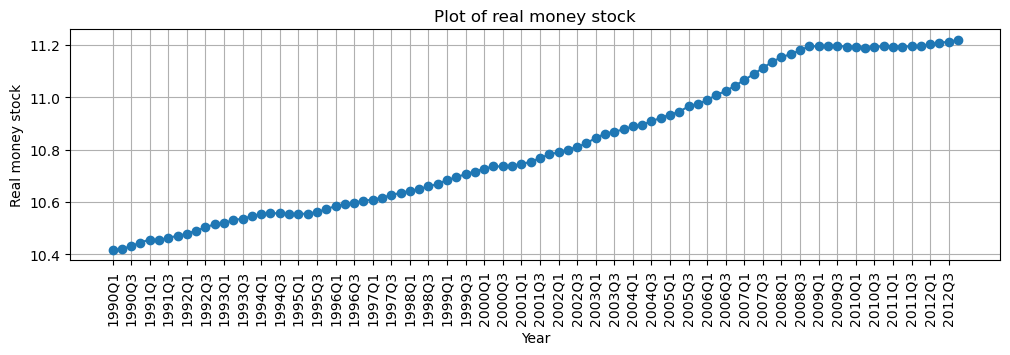

In [90]:
plt.figure(figsize=(12, 3))
plt.plot(df['YEAR'].astype(str), df['m_p'], marker='o', linestyle='-', label='m over Years')
plt.xlabel('Year')
plt.ylabel('Real money stock')
plt.title('Plot of real money stock')
plt.xticks(df['YEAR'].astype(str)[::2].astype(str), rotation=90)  # Convert PeriodIndex to string
plt.grid(True)
plt.show()

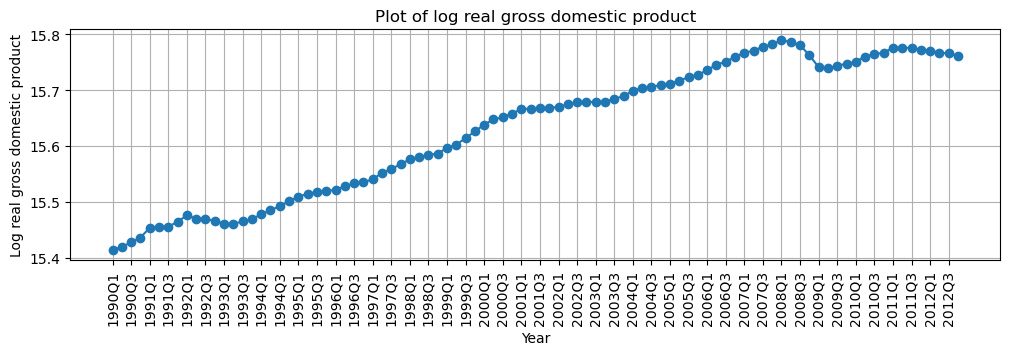

In [91]:
plt.figure(figsize=(12, 3))
plt.plot(df['YEAR'].astype(str), df['y'], marker='o', linestyle='-', label='m over Years')
plt.xlabel('Year')
plt.ylabel('Log real gross domestic product')
plt.title('Plot of log real gross domestic product')
plt.xticks(df['YEAR'].astype(str)[::2], rotation=90)
plt.grid(True)
plt.show()

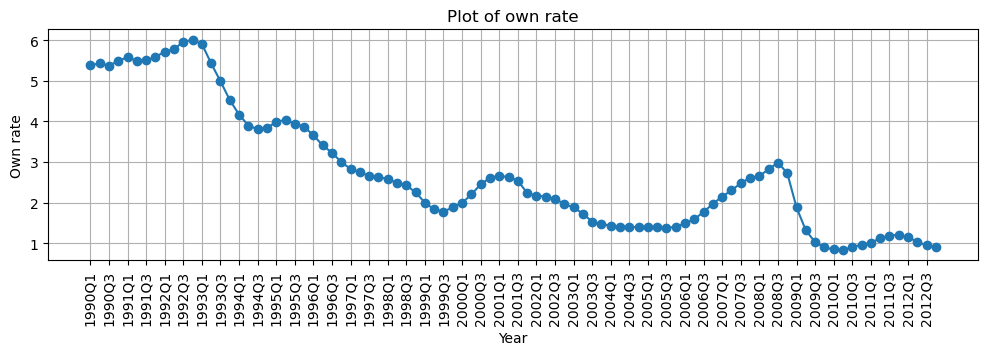

In [92]:
plt.figure(figsize=(12, 3))
plt.plot(df['YEAR'].astype(str), df['OR'], marker='o', linestyle='-', label='m over Years')
plt.xlabel('Year')
plt.ylabel('Own rate')
plt.title('Plot of own rate')
plt.xticks(df['YEAR'].astype(str)[::2], rotation=90)
plt.grid(True)
plt.show()

## B. VECM

In [ ]:
# 1. Estimate VECM for p=1, p=2 (use OLS)
# 2. Compute likelihood function for VECM models p=1, p=2
# 3. Compute AIC, choose best model based on it
# 4. For best model, perform cointegration tests: trace test and maximum eigenvalue test
# 5. If cointegration exists, obtain and interpret alpha matrix.

### B.1 Estimate VECM for p=1, p=2

In [ ]:
def ols(X, Y):
    return np.linalg.inv(X.T @ X) @ (X.T @ Y)

delta_m_p = df['m_p'].diff().dropna()
delta_y = df['y'].diff().dropna()
delta_or = df['OR'].diff().dropna()

In [209]:
# Estimate VECM for p=1 using OLS
# delta y_t = Pi * y_t-1 + e_t
# Pi = alpha * beta'

# Data lagged by one as X
X_p1 = np.column_stack((df['m_p'][1:], df['y'][1:], df['OR'][1:]))

# Delta of data as y
y_p1 = np.column_stack((delta_m_p, delta_y, delta_or))

# estimated parameters
beta_p1 = ols(X_p1, y_p1)
print("VECM Coefficients for p=1:")
print(beta_p1)

VECM Coefficients for p=1:
[[-1.00997916e-03 -2.42542267e-02  3.36602313e-02]
 [ 1.26204290e-03  1.73773986e-02 -2.65946411e-02]
 [ 7.00540751e-06 -2.03254596e-03  9.28624253e-04]]


In [210]:
# Estimate VECM for p=2
# delta_y_t = Pi * y_t-1 + Gamma_1 * delta_y_t-1 + e_t

# Data lagged by 1, we also drop the last row to match the dimensions of delta_y_t-1
lagged_1_y = np.column_stack((df['m_p'][1:-1], df['y'][1:-1], df['OR'][1:-1]))

# Lagged by one delta of data, the fact that it's delta reduces number of rows by 1 and then lag also reduces it by 1
lagged_1_delta_y = np.column_stack((delta_m_p[1:], delta_y[1:], delta_or[1:]))
X_p2 = np.hstack((lagged_1_y, lagged_1_delta_y))

# delta of data as y, we drop the last row to match the dimensions of delta_y_t-1
y_p2 = np.column_stack((delta_m_p[:-1], delta_y[:-1], delta_or[:-1]))

beta_p2 = ols(X_p2, y_p2)
print("VECM Coefficients for p=2:")
print(beta_p2)

VECM Coefficients for p=2:
[[ 7.90736887e-04 -1.53804285e-02 -8.03143191e-02]
 [-3.77792676e-04  1.10975630e-02  5.46945544e-02]
 [ 9.09432041e-05 -1.00805302e-03  5.77576083e-03]
 [ 6.95486405e-01 -8.31118404e-02  3.84545631e+00]
 [-7.60282445e-02  2.47113828e-01 -1.10656896e+01]
 [-1.45597671e-03  1.44085919e-02  8.67380356e-01]]


### B.2 Compute likelihood function for VECM models p=1, p=2

In [211]:
def compute_residuals(X, beta, Y):
    return Y - X @ beta

def compute_covariance(residuals):
    T = residuals.shape[0]
    return (residuals.T @ residuals) / T

def log_likelihood(residuals):
    T, n = residuals.shape
    Sigma = compute_covariance(residuals)
    det_Sigma = np.linalg.det(Sigma)
    inv_Sigma = np.linalg.inv(Sigma)
    trace_term = np.trace(inv_Sigma @ (residuals.T @ residuals) / T)
    return -0.5 * T * (n * np.log(2 * np.pi) + np.log(det_Sigma) + trace_term)

residuals_p1 = compute_residuals(X_p1, beta_p1, y_p1)
ll_p1 = log_likelihood(residuals_p1)
print("Log-Likelihood for VECM (p=1):", ll_p1)

residuals_p2 = compute_residuals(X_p2, beta_p2, y_p2)
ll_p2 = log_likelihood(residuals_p2)
print("Log-Likelihood for VECM (p=2):", ll_p2)

Log-Likelihood for VECM (p=1): 723.1927955671894
Log-Likelihood for VECM (p=2): 810.0338073305497


### B.3 Compute AIC, choose best model based on it

In [212]:
def compute_aic(log_likelihood, num_params):
    return -2 * log_likelihood + 2 * num_params

aic_p1 = compute_aic(ll_p1, beta_p1.size)
aic_p2 = compute_aic(ll_p2, beta_p2.size)

print("AIC for VECM (p=1):", aic_p1)
print("AIC for VECM (p=2):", aic_p2)

AIC for VECM (p=1): -1428.3855911343787
AIC for VECM (p=2): -1584.0676146610995


### B.4 For best model, perform cointegration tests: trace test and maximum eigenvalue test

In [219]:
def cointegration_tests(X):
    T = X.shape[0]

    # Step 1: Compute the covariance matrices
    S_00 = X.T @ X / T
    S_11 = X[1:].T @ X[1:] / (T - 1)
    S_01 = X[1:].T @ X[:-1] / (T - 1)
    S_10 = S_01.T

    # Step 2: Compute the eigenvalues of the cointegration matrix
    eigvals, eigvecs = np.linalg.eig(np.linalg.inv(S_11) @ S_10 @ np.linalg.inv(S_00) @ S_01)

    # Sort eigenvalues in descending order
    eigvals = np.sort(np.real(eigvals))[::-1]

    # Trace Test
    trace_stat = -T * np.sum(np.log(1 - eigvals[2:]))

    # Max-Eigenvalue Test
    max_eigen_stat = -T * np.log(1 - eigvals[2])

    return trace_stat, max_eigen_stat, eigvals

X_best = np.column_stack((delta_m_p[2:], delta_y[2:], delta_or[2:]))

trace_stat, max_eigen_stat, eigenvalues = cointegration_tests(X_best)

print(f"Trace Statistic: {trace_stat}")
print(f"Maximum Eigenvalue Statistic: {max_eigen_stat}")
print(f"Eigenvalues: {eigenvalues}")

Trace Statistic: 56.36322020014797
Maximum Eigenvalue Statistic: 56.36322020014797
Eigenvalues: [0.82026413 0.69453246 0.46915999]


### B.5 If cointegration exists, obtain and interpret alpha matrix.

In [215]:
def compute_alpha(X):
    T = X.shape[0]

    # Step 1: Compute the covariance matrices
    S_00 = X.T @ X / T
    S_11 = X[1:].T @ X[1:] / (T - 1)
    S_01 = X[1:].T @ X[:-1] / (T - 1)
    S_10 = S_01.T

    # Step 2: Compute the eigenvalues and eigenvectors of the cointegration matrix
    eigvals, eigvecs = np.linalg.eig(np.linalg.inv(S_11) @ S_10 @ np.linalg.inv(S_00) @ S_01)

    # Real eigenvalues and eigenvectors
    eigvals = np.real(eigvals)
    eigvecs = np.real(eigvecs)

    # Step 3: Construct diagonal matrix of eigenvalues
    Lambda = np.diag(eigvals)

    # Step 4: Compute the alpha matrix as V * Lambda
    alpha = eigvecs @ Lambda

    return alpha

alpha_matrix = compute_alpha(X_best)

print("Alpha Matrix:")
print(alpha_matrix)

Alpha Matrix:
[[ 0.16121065 -0.80504423  0.64656395]
 [-0.44057755 -0.15636556  0.23249969]
 [ 0.00369504  0.01693633  0.10136219]]
